In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pylab as plt
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination
from pgmpy.models import BayesianNetwork
from pgmpy.sampling import BayesianModelSampling

# Question 1

## a)

### i.

Since $C_T$ is not a random variable,

$$
\mathbb{E}[Y_T - C_T] = \mathbb{E}[Y_T] - C_T.
$$

Denote the winnings from roll $i$ by $Y_i$. Since $Y_i \sim \text{Uniform}(1, 2, 3, 4, 5, 0)$,

$$
\mathbb{E}[Y_i] = \frac{1}{6} \left( 1 + 2 + 3 + 4 + 5 + 0 \right) = \frac{5}{2}.
$$

The probability of a six not being rolled on or after the second roll is $\left( \frac{5}{6} \right) ^ {T-1}$.

Therefore, we have that

$$
\mathbb{E}[Y_T - C_T] = \frac{5}{2} T \left( \frac{5}{6} \right) ^ {T-1} - C_T.
$$

### ii.

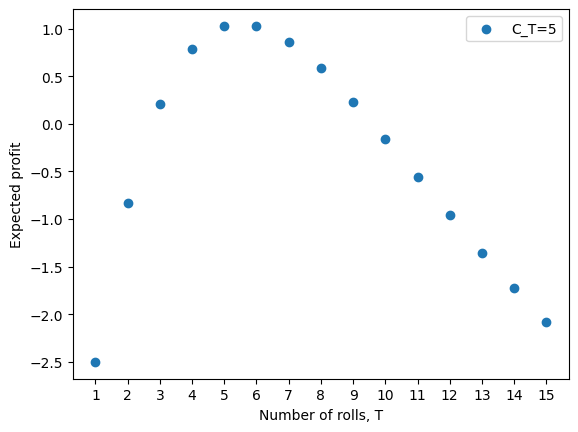

In [2]:
def calculate_expected_accumulated_winnings(T):
    # Use the equation above
    return (5/2) * T * (5/6) ** (T-1)

Ts = np.arange(1, 16)
expected_profits = []

for T in Ts:
    expected_profits.append(calculate_expected_accumulated_winnings(T) - 5)

plt.scatter(Ts, expected_profits, label='C_T=5')
plt.ylabel('Expected profit')
plt.xlabel('Number of rolls, T')
plt.xticks(Ts)
plt.legend()
plt.show()

From the above plot, we can see that $T \in \{3, 4, 5, 6, 7, 8, 9 \}$ lead to a positive expected profit.

### iii.

When $C \leq £6.02$, either take 5 or 6 rolls.

When $C > £6.02$, do not participate.

## b)

In [3]:
def simulate_game(T):
    accumulated_winnings = 0
    # Iterate through T rolls
    for _ in range(T):
        roll = np.random.randint(1, 7)
        # Handle the case when a six is rolled
        if roll == 6:
            accumulated_winnings = 0
            break
        else:
            accumulated_winnings += roll
    return accumulated_winnings

def calculate_pmf(T, n_sim):
    results = []
    # Iterate through n_sim simulations
    for _ in range(n_sim):
        result = simulate_game(T)
        results.append(result)
    # Initialise pmf as an array containing an entry for each Y_T = [ 0, ..., 5T ]
    pmf = np.zeros(5*T + 1)
    for result in results:
        pmf[result] += 1
    pmf /= n_sim
    return pmf

In [4]:
# Evaluate P(Y_3 = 5)
print('P(Y_3 = 5) =', calculate_pmf(3, int(1e7))[5])

# Evaluate P(Y_8 = 30)
print('P(Y_8 = 30) =', calculate_pmf(8, int(1e7))[30])

P(Y_3 = 5) = 0.0277881
P(Y_8 = 30) = 0.0078341


## c)

### i.

In [5]:
def calculate_expected_utility(T, C_T, u_func, n_sim):
    pmf = calculate_pmf(T, n_sim)
    possible_profits = np.arange(5*T + 1) - C_T
    utilities = u_func(possible_profits)
    return np.sum(pmf * utilities)

### ii.

In [6]:
def u(x):
    # Use Equation 1
    return np.log(x + 50) - np.log(50)

calculate_expected_utility(7, 5, u, int(1e7))

0.0010781002599434457

If $7$ was the only option for $T$, the player would choose to enter into this game as the expected utility is positive.

### iii.

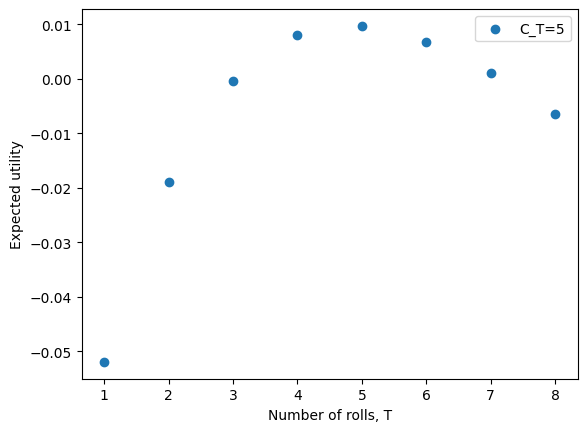

In [7]:
Ts = np.arange(1, 9)
expected_utilities = []

for T in Ts:
    expected_utilities.append(calculate_expected_utility(T, 5, u, int(1e7)))

plt.scatter(Ts, expected_utilities, label='C_T=5')
plt.ylabel('Expected utility')
plt.xlabel('Number of rolls, T')
plt.legend()
plt.show()

From the above plot, we can see that, within this range, the expected utility is positive for $T \in \{4, 5, 6, 7 \}$ so the player would be prepared to play for these values of $T$ if the only choices were to not participate or play at each value of $T$.

## d)

<div style="height:11.4cm;">

### i.

We follow a similar argument to that presented in 1. a) i.

If the die has two sides showing six, with the one side not present, then $Y_i \sim \text{Uniform}(0, 2, 3, 4, 5, 0)$ and

$$
\mathbb{E}[Y_i] = \frac{1}{6} \left( 0 + 2 + 3 + 4 + 5 + 0 \right) = \frac{7}{3}.
$$

The probability of a six not being rolled on or after the second roll is $\left( \frac{2}{3} \right) ^ {T-1}$.

Therefore, we have that

$$
\mathbb{E}[Y_T] = \frac{7}{3} T \left( \frac{2}{3} \right) ^ {T-1}.
$$

Combining this possibility with the possibility that the die is fair,

$$
\mathbb{E}[Y_T - C_T] = \left( 1 - p \right) \frac{5}{2} T \left( \frac{5}{6} \right) ^ {T-1} + p \frac{7}{3} T \left( \frac{2}{3} \right) ^ {T-1} - C_T
$$

$$
\mathbb{E}[Y_T - C_T] = \left( 1 - p \right) \frac{5}{2} T \left( \frac{5}{6} \right) ^ {T-1} + p \frac{7}{3} T \left( \frac{2}{3} \right) ^ {T-1} - 0.2T - 3.
$$

### ii.

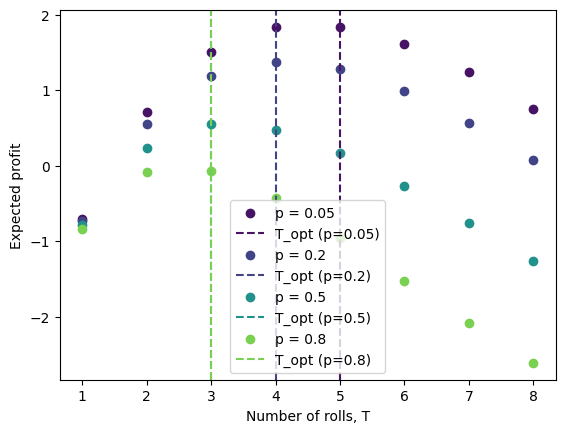

In [8]:
def calculate_expected_profit(T, p):
    # Use the equation above
    return (1-p) * (5/2) * T * (5/6) ** (T-1) + p * (7/3) * T * (2/3) ** (T-1) - 0.2 * T - 3

ps = [0.05, 0.2, 0.5, 0.8]

# Calculate the expected profit for each T and p
expected_profits = {}
for p in ps:
    expected_profits[p] = [calculate_expected_profit(T, p) for T in Ts]

# Find the value of T that maximises the expected profit for each p
optimal_Ts = {}
for p in ps:
    optimal_Ts[p] = Ts[np.argmax(expected_profits[p])]

for p in ps:
    color = plt.cm.viridis(p)
    plt.scatter(Ts, expected_profits[p], label=f'p = {p}', color=color)
    # Plot dashed vertical lines at the values of T that maximise the expected profit
    plt.axvline(x=optimal_Ts[p], label=f'T_opt (p={p})', linestyle='--', color=color)

plt.ylabel('Expected profit')
plt.xlabel('Number of rolls, T')
plt.legend()
plt.show()

For $p=0.05$, the optimal playing strategy is to take $5$ rolls.

For $p=0.2$, the optimal playing strategy is to take $4$ rolls.

For $p=0.5$, the optimal playing strategy is to take $3$ rolls.

For $p=0.8$, the optimal playing strategy is to not participate.

# Question 2

## a)

### i.

If $\mathcal{G}$ was a tree, then each node apart from one (the root) would have exactly one parent. However, $X_5$, $X_6$, $X_7$, $X_8$, $X_9$ and $X_{10}$ each have two parents. Therefore, by contradiction, $\mathcal{G}$ is not a tree.

### ii.

In [9]:
# Define G
model = BayesianNetwork([('X_1', 'X_5'), ('X_2', 'X_5'), ('X_2', 'X_6'),
                         ('X_3', 'X_6'), ('X_3', 'X_7'), ('X_4', 'X_7'),
                         ('X_5', 'X_8'), ('X_6', 'X_8'), ('X_6', 'X_9'),
                         ('X_7', 'X_9'), ('X_8', 'X_10'), ('X_9', 'X_10')])

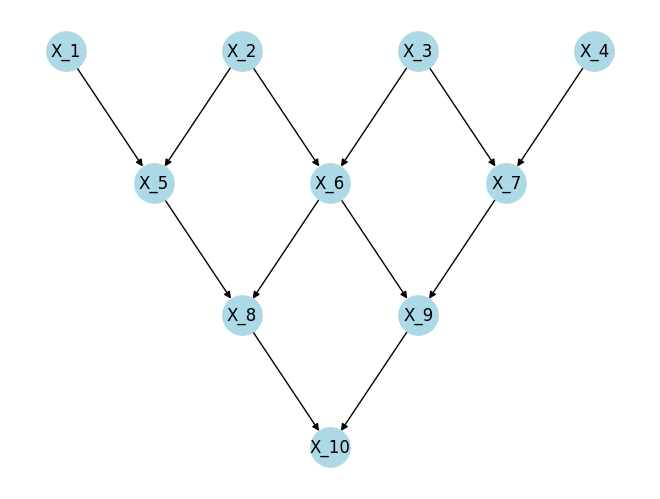

In [10]:
# Plot the graph
pos = {
    'X_1': (1, 4),
    'X_2': (3, 4),
    'X_3': (5, 4),
    'X_4': (7, 4),
    'X_5': (2, 3),
    'X_6': (4, 3),
    'X_7': (6, 3),
    'X_8': (3, 2),
    'X_9': (5, 2),
    'X_10': (4, 1)
}
nx.draw(model, with_labels=True, node_size = 800, node_color = 'lightblue', pos=pos)
plt.show()

## b)

### i.

By Bayes’ theorem,

$$
P( X_1 = 0 \ | \ X_5 = 1 ) = \frac{ P( X_5 = 1 \ | \  X_1 = 0 ) \ P( X_1 = 0 ) } { P( X_5 = 1 ) }.
$$

Note that $X_1, X_2 \sim \text{Uniform}(0, 1, \ldots, 10)$.

Evaluate $P( X_5 = 1 \  | \  X_1 = 0 )$.

$$
P( X_5 = 1 \  | \  X_1 = 0 ) = \frac {1} {11} \sum _ {i=0} ^ {10} P( X_5 = 1 \  | \  X_1 = 0, X_2 = i )
$$
$$
P( X_5 = 1 \  | \  X_1 = 0 ) = \frac {1} {11} \left( \sum _ {i=0} ^ {10} \frac{1}{i + 1} - 1 \right)
$$
$$
P( X_5 = 1 \  | \  X_1 = 0 ) = 0.18362521317066768
$$

Note that the subtraction of $1$ is a necessary correction due to the fact that $P( X_5 = 1 \  | \  X_1 = 0, X_2 = 0 ) = 0$.

Evaluate $P( X_1 = 0 )$.

$$
P( X_1 = 0 ) = \frac {1} {11} = 0.09090909090909091
$$

Evaluate $P( X_5 = 1 )$.

$$
P( X_5 = 1 ) = \frac {1} {11^2} \sum _ {i=0} ^ {10} \sum _ {j=0} ^ {10} P( X_5 = 1 \  | \  X_1 = i, X_2 = j )
$$
$$
P( X_5 = 1 ) = \frac {1} {11^2} \left( \sum _ {i=0} ^ {10} \sum _ {j=0} ^ {10} \frac{1}{i + j + 1} - 1 \right)
$$
$$
P( X_5 = 1 ) = 0.11372388361552443
$$

Plugging the above into Bayes’ theorem, we have that

$$
P( X_1 = 0 \ | \ X_5 = 1 ) = 0.1468 \ \text{to 4 decimal places}.
$$

### ii.

Since $X_1 \sim \text{Uniform}(0, 1, \ldots, 10)$, $\mathbb{E}[X_1] = \frac {0 + 10} {2} = 5$. This argument can be applied to $X_2$, $X_3$ and $X_4$.

For the remaining nodes, we start by establishing the following two results.

**Lemma 2.1:** For two discrete random variables $X$, $Y$, if $Z \sim \text{Uniform}(0, 1, \ldots , X + Y)$, then $\mathbb{E}[Z] = \frac {1} {2} \mathbb{E}[ X + Y ]$.

**Proof:**

By the Law of Total Expectation,

$$
\mathbb{E}[Z] = \mathbb{E}[\mathbb{E}[Z \ | \  X + Y]].
$$

It then follows that

$$
\mathbb{E}[Z] = \mathbb{E} \left[ \frac{ X + Y } { 2 } \right] = \frac {1} {2} \mathbb{E}[ X + Y ].
$$

**End of proof.**

**Lemma 2.2:** For two discrete random variables $X$, $Y$, $\mathbb{E}[X + Y] = \mathbb{E}[X] + \mathbb{E}[Y]$.

**Proof:**

$$
\mathbb{E}[X+Y] = \sum_x \sum_y [(x+y)P(X=x,Y=y)]
$$
$$
\mathbb{E}[X+Y] = \sum_x \sum_y \left[xP(X=x,Y=y)\right] + \sum_x \sum_y \left[yP(X=x,Y=y)\right]
$$
$$
\mathbb{E}[X+Y] = \sum_x x \sum_y [P(X=x,Y=y)] + \sum_y y \sum_x [P(X=x,Y=y)]
$$
$$
\mathbb{E}[X+Y] = \sum_x x P(X=x) + \sum_y y P(Y=y)
$$
$$
\mathbb{E}[X+Y] = \mathbb{E}[X] + \mathbb{E}[Y]
$$

**End of proof.**

Now consider $X_5$.

From Lemma 2.1,

$$
\mathbb{E}[X_5] = \frac {1} {2} \mathbb{E}[X_1 + X_2].
$$

From Lemma 2.2,

$$
\mathbb{E}[X_1 + X_2] = \mathbb{E}[X_1] + \mathbb{E}[X_2].
$$

Combining the above, we have that

$$
\mathbb{E}[X_5] = \frac {1} {2} \left( \mathbb{E}[X_1] + \mathbb{E}[X_2] \right) = \frac {1} {2} \left( 5 + 5 \right) = 5.
$$

This argument can be applied to $X_6$, $X_7$, $X_8$, $X_9$ and $X_{10}$, which gives the required result.

## c)

### i.

In [11]:
# Define the CPDs

# Use the distribution in Equation 2
values_1_2_3_4 = [[1/11]]*11
cpd_1 = TabularCPD(variable='X_1', variable_card=11, values=values_1_2_3_4)
cpd_2 = TabularCPD(variable='X_2', variable_card=11, values=values_1_2_3_4)
cpd_3 = TabularCPD(variable='X_3', variable_card=11, values=values_1_2_3_4)
cpd_4 = TabularCPD(variable='X_4', variable_card=11, values=values_1_2_3_4)

In [12]:
# For conciseness, define a function to create the 2D values list for a node given the possible values of the two parent nodes
def create_values(possible_parent_values):
    # Initialise an array to store the CPDs
    # Rows correspond to possible values of the node
    # Columns correspond to permutations of the possible values of the two parent nodes
    P = np.zeros((2 * len(possible_parent_values) - 1, len(possible_parent_values) ** 2))
    column = 0
    for parent_1 in possible_parent_values:
        for parent_2 in possible_parent_values:
            # Use the distribution in Equation 2
            P[0 : parent_1 + parent_2 + 1, column] = 1 / (parent_1 + parent_2 + 1)
            column += 1
    # Convert to 2D list to be compatible with TabularCPD function
    return P.tolist()

In [13]:
# The parent nodes of X_5, X_6, X_7 can take the values 0, 1, ..., 10
values_5_6_7 = create_values(np.arange(0, 11))
cpd_5 = TabularCPD(variable='X_5', variable_card=21, values=values_5_6_7,
                   evidence=['X_1', 'X_2'], evidence_card=[11, 11])
cpd_6 = TabularCPD(variable='X_6', variable_card=21, values=values_5_6_7,
                   evidence=['X_2', 'X_3'], evidence_card=[11, 11])
cpd_7 = TabularCPD(variable='X_7', variable_card=21, values=values_5_6_7,
                   evidence=['X_3', 'X_4'], evidence_card=[11, 11])

# The parent nodes of X_8, X_9 can take the values 0, 1, ..., 20
values_8_9 = create_values(np.arange(0, 21))
cpd_8 = TabularCPD(variable='X_8', variable_card=41, values=values_8_9,
                   evidence=['X_5', 'X_6'], evidence_card=[21, 21])
cpd_9 = TabularCPD(variable='X_9', variable_card=41, values=values_8_9,
                   evidence=['X_6', 'X_7'], evidence_card=[21, 21])

# The parent nodes of X_10 can take the values 0, 1, ..., 40
values_10 = create_values(np.arange(0, 41))
cpd_10 = TabularCPD(variable='X_10', variable_card=81, values=values_10,
                    evidence=['X_8', 'X_9'], evidence_card=[41, 41])

In [14]:
# Associate the CPDs with the graph
model.add_cpds(cpd_1, cpd_2, cpd_3, cpd_4, cpd_5, cpd_6, cpd_7, cpd_8, cpd_9, cpd_10)

# Check that the CPDs are correctly defined
model.check_model()

True

In [15]:
infer = VariableElimination(model)

# Evaluate P(X_3 = 1 | X_7 = 1)
posterior = infer.query(variables=['X_3'], evidence={'X_7': 1})
print('P(X_3 = 1 | X_7 = 1) =', posterior.values[1])

P(X_3 = 1 | X_7 = 1) = 0.15284306056815314


### ii.

In [16]:
cardinalities = {}
for node in ['X_1', 'X_2', 'X_3', 'X_4', 'X_5', 'X_6', 'X_7', 'X_8', 'X_9', 'X_10']:
    cardinalities[node] = model.get_cardinality(node)

# Display the cardinality of each node variable
print("Cardinality of each node variable:")
print(cardinalities)

Cardinality of each node variable:
{'X_1': 11, 'X_2': 11, 'X_3': 11, 'X_4': 11, 'X_5': 21, 'X_6': 21, 'X_7': 21, 'X_8': 41, 'X_9': 41, 'X_10': 81}


### iii.

In [17]:
infer = VariableElimination(model)

# Evaluate the marginal probability P(X_10 = 80)
posterior = infer.query(variables=['X_10'], evidence={})
print('P(X_10 = 80) =', posterior.values[80])

P(X_10 = 80) = 5.4164986949938696e-14


### iv.

In [18]:
sample = BayesianModelSampling(model)

# Perform forward sampling to generate data
data = sample.forward_sample(size=int(1e7))

# Extract values of X_7 and X_8 from data
X_7_values = data['X_7']
X_8_values = data['X_8']

# Calculate Pearson's correlation coefficient for the variables X_7 and X_8
pearsons_correlation_coefficient = np.corrcoef(X_7_values, X_8_values)[0, 1]
print("Pearson's correlation coefficient for the variables X_7 and X_8:", pearsons_correlation_coefficient)

  0%|          | 0/10 [00:00<?, ?it/s]

Pearson's correlation coefficient for the variables X_7 and X_8: 0.06375602279625439


The warnings are simply due to the limited precision of floating-point numbers in Python.